In [1]:
import numpy as np

In [2]:
N = 2048 # Number of grid points per side in real space
delta = 0.0025 # Separation between grid points in real space

In [3]:
delta_f = 1/(N*delta) # Separation between grid points in k space

In [4]:
f_x = np.arange(-np.floor(N/2), np.floor(N/2)) * delta_f

In [5]:
f_x, f_y = np.meshgrid(f_x, f_x)

In [6]:
def cart2pol(x, y):
    f = np.sqrt(x**2 + y**2)
    th = np.arctan2(y, x)
    return th, f

In [7]:
th, f = cart2pol(f_x, f_y)

In [8]:
r0 = 0.1 # Atmospheric coherence diameter [m]
l0 = 0.001 # Turbulence inner scale [m]
L0 = 1000 # Turbulence outer scale [m]

In [9]:
f_m = 5.92/(np.pi*l0)
f_0 = 1/L0

In [10]:
PSD_phi = 0.023 * r0 ** (-5/3) * np.exp(-(f/f_m)**2) / (f**2 + f_0**2) ** (11/6)

In [11]:
#PSD_phi[8,8]
# For some reason this one is huge
PSD_phi[int(N/2),int(N/2)] = 0

In [12]:
im = np.random.normal(size=(N, N))
re = np.random.normal(size=(N, N))
cn = (1j*im + re) * np.sqrt(PSD_phi) * delta_f

In [13]:
def ift2(G, delta_f):
    N, N = G.shape
    return np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(G))) * (N * delta_f)**2

In [14]:
phz = np.real(ift2(cn, 1))

In [227]:
D=2
r0=0.1
N=16
delta=0.25
L0=1000
l0=0.001

In [243]:
delta_f = 1/(N*delta) 
f_x = np.arange(-np.floor(N/2), np.floor(N/2)) * delta_f
f_x, f_y = np.meshgrid(f_x, f_x)

def cart2pol(x, y):
    f = np.sqrt(x**2 + y**2)
    th = np.arctan2(y, x)
    return th, f

th, f = cart2pol(f_x, f_y)

f_m = 5.92/l0/(2*np.pi)
f_0 = 1/L0

PSD_phi = 0.023 * r0 ** (-5/3) * np.exp(-(f/f_m)**2) / ((f**2 + f_0**2) ** (11/6))

PSD_phi[8, 8] = 0

im = np.random.normal(size=(N, N))
re = np.random.normal(size=(N, N))
cn = (1j*im + re) * np.sqrt(PSD_phi) * delta_f

cn.mean()

(0.012746299979309747+0.01614804317013919j)

In [220]:
def ft_phase_screen(D=2, r0=0.1, N=2048, delta=0.0025, L0=1000, l0=0.001):
    delta_f = 1/(N*delta) 
    f_x = np.arange(-np.floor(N/2), np.floor(N/2)) * delta_f
    f_x, f_y = np.meshgrid(f_x, f_x)
    
    def cart2pol(x, y):
        f = np.sqrt(x**2 + y**2)
        th = np.arctan2(y, x)
        return th, f
    
    th, f = cart2pol(f_x, f_y)
    f_m = 5.92/l0/(2*np.pi)
    f_0 = 1/L0
    
    PSD_phi = 0.023 * r0 ** (-5/3) * np.exp(-(f/f_m)**2) / ((f**2 + f_0**2) ** (11/6))
    PSD_phi[int(N/2),int(N/2)] = 0
    
    im = np.random.normal(size=(N, N))
    re = np.random.normal(size=(N, N))
    cn = (1j*im + re) * np.sqrt(PSD_phi) * delta_f
    
    def ift2(G, delta_f):
        N, N = G.shape
        return np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(G))) * (N * delta_f)**2
    
    phz = np.real(ift2(cn, 1))
    
    return phz

In [221]:
def str_fcn2_ft(ph, mask=None, delta=0.0025):
    N, N = ph.shape
    if mask is None:
        mask = np.ones([N,N])
        
    def ft2(g, delta):
        G = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(g))) * delta**2
        return G
    
    P = ft2(ph, delta)
    S = ft2(ph**2, delta)
    W = ft2(mask, delta)
    
    delta_f = 1/(N*delta) 
    
    def ift2(G, delta_f):
        N, N = G.shape
        g = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(G))) * (N * delta_f)**2
        return g
    
    G = W * np.conj(W)
    w2 = ift2(G, delta_f)
    
    G = np.real(S * np.conj(W) - np.abs(P)**2)
    D = 2 * ift2(G, delta_f) / w2 * mask
    
    return D

In [222]:
D = str_fcn2_ft(phz)

In [223]:
from matplotlib import pyplot as plt
%matplotlib inline 

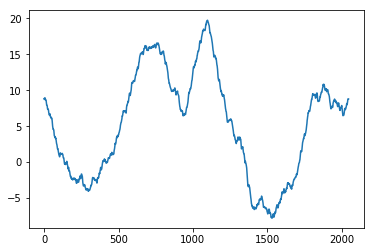

In [224]:
pd.Series(ft_phase_screen(N=N, delta=delta, L0=1000, l0=0.0001)[1026]).plot()

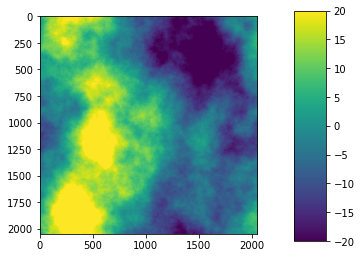

In [203]:
plt.imshow(ft_phase_screen(N=N, delta=delta, L0=10000, l0=0.0001)).set_clim(-20, 20)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

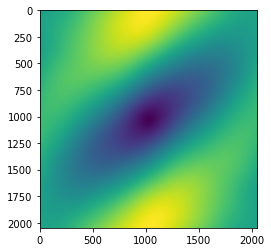

In [204]:
D = str_fcn2_ft(phz)
plt.imshow(D.real)
plt.show()

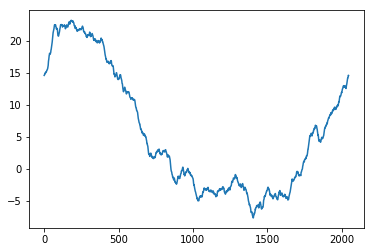

In [205]:
import pandas as pd
pd.Series(phz[102]).plot()

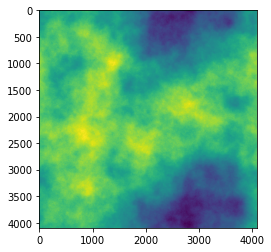

In [23]:
phz = ft_phase_screen(N=4096, delta=0.0025, L0=10000, l0=0.0001)
plt.imshow(phz)
plt.show()

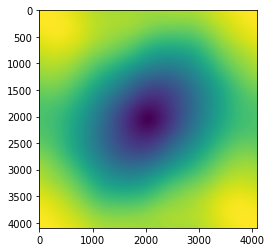

In [24]:
D = str_fcn2_ft(phz)
plt.imshow(D.real)
plt.show()

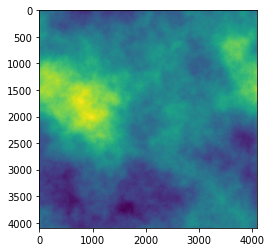

In [21]:
phz = ft_phase_screen(N=4096, delta=0.0025, L0=1000, l0=0.001)
plt.imshow(phz)
plt.show()

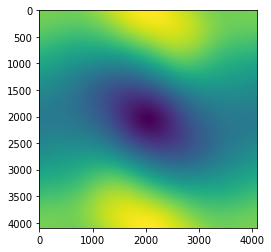

In [22]:
D = str_fcn2_ft(phz)
plt.imshow(D.real)
plt.show()

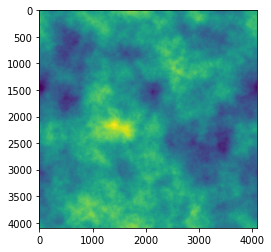

In [17]:
phz = ft_phase_screen(N=4096, delta=0.0025, L0=10, l0=0.1)
plt.imshow(phz)
plt.show()

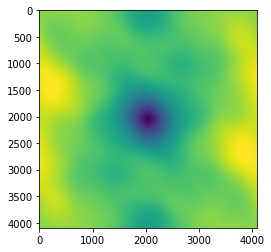

In [18]:
D = str_fcn2_ft(phz)
plt.imshow(D.real)
plt.show()

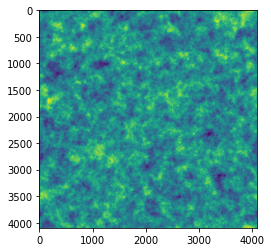

In [19]:
phz = ft_phase_screen(N=4096, delta=0.0025, L0=1, l0=0.1)
plt.imshow(phz)
plt.show()

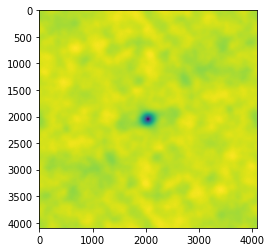

In [20]:
D = str_fcn2_ft(phz)
plt.imshow(D.real)
plt.show()

In [28]:
import pandas as pd

In [32]:
aDict = {}
for i in range(10):
    phz = ft_phase_screen(N=4096, delta=0.0025, L0=1000, l0=0.001)
    D = str_fcn2_ft(phz).real
    aDict[i] = pd.Series(D[2048, 2048 :])
    print('Done w', i)


Done w 0
Done w 1
Done w 2
Done w 3
Done w 4
Done w 5
Done w 6
Done w 7
Done w 8
Done w 9


In [43]:
aDict = {}
for i in range(10):
    phz = ft_phase_screen(N=256, delta=0.0078125, L0=100, l0=0.01)
    D = str_fcn2_ft(phz).real
    aDict[i] = pd.Series(D[128, 128 :])
    print('Done w', i)
    
df = pd.DataFrame(aDict)

Done w 0
Done w 1
Done w 2
Done w 3
Done w 4
Done w 5
Done w 6
Done w 7
Done w 8
Done w 9


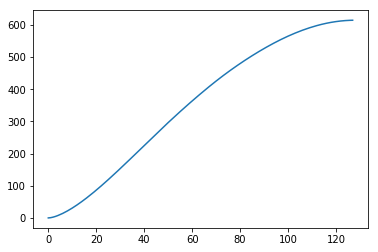

In [45]:
df.mean(axis=1).div(.1).plot()

In [206]:
                      # Geometry
D2 = 0.5              # Diameter of observation aperture [m]
wvl = .5e-6            # Optical wavelenght [m]
k = 2 * np.pi / wvl   # wavenumber [rad/m]
propDist = 10e3       # propagation distance [m]

In [207]:
def SplitStepProp(Uin, phaseScreenStack):
    
    N, N = Uin.shape
    nx = np.arange(-np.floor(N/2), np.floor(N/2))
    nx, ny = np.meshgrid(nx, nx)
    k = 2 * np.pi / wvl
    
    r1 = np.sqrt(nx**2 + ny**2) # radius
    
    # Super Gaussian absorbing boundary
    def MakeSGB(sigma=0.55):
        rad = np.sqrt(nx**2 + ny**2) # radius
        w = sigma*N 
        sg = np.exp(-(( rad / w)**16)) # Flatte et al use a SG with n=8
        
        return sg
    
    sg = MakeSGB(sigma=0.55)
    
    # Propagation Geometry   
    numScr = phaseScreenStack.shape[2]
    dzProps = np.ones(numScr + 2) * (propDist / numScr)
    dzProps[0:2] = 0.5 * (propDist / numScr)
    dzProps[numScr:numScr+2] = 0.5 * (propDist / numScr)

    propLocs = np.zeros(numScr + 3)

    for zval in range(0, numScr+2):
        propLocs[zval+1] = propLocs[zval] + dzProps[zval]

    fracPropDist = propLocs/propDist

    propSampling = (Rdx - dx) * fracPropDist + dx
    samplingRatio = propSampling[1:len(propSampling)] / propSampling[0:len(propSampling)-1]
    
    P0 = np.exp(1j* (k/ (2*dzProps[0]) ) * (r1**2) * (1-samplingRatio[0]) )
    
    plane = np.ones([N, N])
    source = plane
    
    # Initial propagation
    Uin = P0 * source * np.exp(1j * phaseScreenStack[:,:,0])
    
    for pcount in range(1,len(propLocs)-2):
        UinSpec = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(Uin)))  

        #Set spatial frequencies at propagation plane
        delta_f = 1/(N * propSampling[pcount])
        f_x = nx * delta_f
        f_y = ny * delta_f
        fsq = f_x*2 + f_y**2
    
        #Quadratic Phase Factor
        quadPhaseFac = np.exp( -1j * np.pi * wvl * dzProps[pcount] * samplingRatio[pcount] * fsq)
            
        Uin = np.fft.ifftshift(np.fft.ifft2( np.fft.ifftshift(UinSpec * quadPhaseFac)) ) 
            
        Uin = Uin * sg * np.exp(1j * phaseScreenStack[:,:,pcount-1])
        
    x = np.linspace(N/2, N/2-1, N) * Rdx
    y = x
    xR, yR = np.meshgrid(x, y)
    rR = np.sqrt(xR**2 + yR**2)
        
    PF = np.exp(1j* ( k/ (2*dzProps[-1]) ) * (rR**2) * (samplingRatio[-1]))
    
    Uout = PF * Uin
    return Uout

In [208]:
loon = 0

N = 2048                  # Number of grid points per side in real space
delta = 0.0025            # Separation between grid points in real space
L0=10000
l0=0.0001

numScr = 5
plane = np.ones([N, N])

dx = 5e-3             # Sampling interval at source
Rdx = dx              # Sampling interval at receiver
propDist = 10e3       # propagation distance [m]

phz = np.zeros(shape=(N, N, numScr))
#phz_lo = np.zeros(shape=(N, N, NumScr))
phz_hi = np.zeros(shape=(N, N, numScr))


for idxscr in range(0,numScr):
    phz_hi[:,:,idxscr] = ft_phase_screen(D=2, r0=0.1, N=N, delta=delta, L0=1000, l0=0.001)
    phz[:,:,idxscr] = phz_hi[:,:,idxscr]
    
phaseScreenStack = np.exp(1j*phz)
res = SplitStepProp(plane, phaseScreenStack)

print(res)

[[ 1.06531268e-28-7.78163020e-29j -1.46721588e-28+1.36876960e-28j
   1.95122261e-28-2.46836118e-28j ... -7.88499637e-29+5.10829156e-28j
   3.58907561e-30-3.13812835e-28j  2.37735926e-29+2.03184400e-28j]
 [-5.11432729e-28-4.76938205e-28j  9.01507213e-28+6.13839027e-28j
  -1.41469298e-27-6.68309242e-28j ...  2.64612986e-27-1.26074302e-28j
  -1.56383756e-27+2.81119407e-28j  9.79471927e-28-3.46150950e-28j]
 [-3.14801686e-28-9.23236229e-28j  7.31727830e-28+1.35517351e-27j
  -1.37667061e-27-1.89353575e-27j ...  3.09892297e-27+1.57092015e-27j
  -1.96481766e-27-7.04445541e-28j  1.33865001e-27+2.66306468e-28j]
 ...
 [-1.25294692e-27-4.63210227e-28j  2.07033729e-27+3.58624558e-28j
  -3.13833142e-27-5.15280893e-29j ...  4.35579018e-27-2.00624088e-27j
  -2.58112439e-27+1.83883890e-27j  1.47906739e-27-1.50294064e-27j]
 [ 3.73378178e-28-1.61289190e-28j -5.39340927e-28+3.10739790e-28j
   7.11901950e-28-6.98874965e-28j ... -5.45743279e-28+1.42052463e-27j
   1.50205251e-28-1.00721627e-27j  8.16717031e-

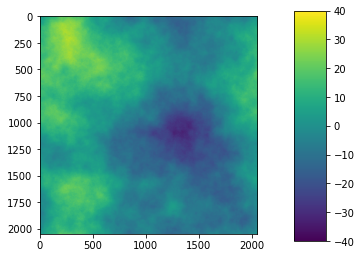

In [209]:
phz = ft_phase_screen(D=2, r0=0.1, N=N, delta=delta, L0=1000, l0=0.001)
#plt.imshow(phz)
plt.imshow(phz).set_clim(-40, 40)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [210]:
phz[1024, 1024]

-15.177349964069883

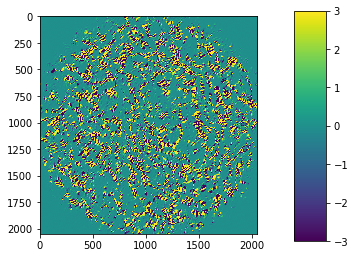

In [211]:
plt.imshow(res.real).set_clim(-3, 3)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [212]:
intensity = np.conjugate(res) * res

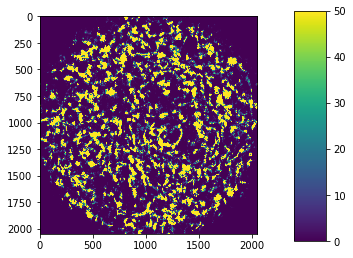

In [213]:
plt.imshow(intensity.real).set_clim(0, 50)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [214]:
df = pd.DataFrame(intensity.real)

In [215]:
m = df.mean().mean()

In [217]:
m

189.64315085084945

In [216]:
v = df.var().var()

In [218]:
v

76235505801642.06

In [117]:
v/1e12

318.5267891784083

In [118]:
v/m**2

3219718686.5661197

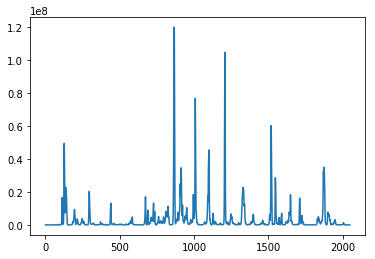

In [54]:
df.var().plot()

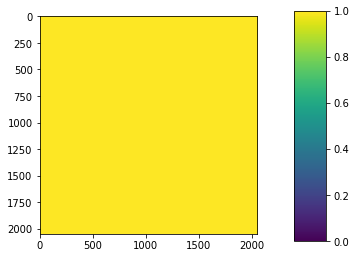

In [36]:
plt.imshow(plane.real).set_clim(0, 1)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])a
plt.colorbar(cax=cax)
plt.show()

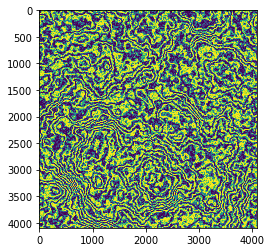

In [452]:
plt.imshow(phaseScreenStack[:,:,0].real)
plt.show()

In [336]:
dx = 5e-3             # Sampling interval at source
Rdx = dx              # Sampling interval at receiver
propDist = 10e3       # propagation distance [m]

numScr = 7            # Number of Screens

dzProps = np.ones(numScr + 2) * (propDist / numScr)
dzProps[0:2] = 0.5 * (propDist / numScr)
dzProps[numScr:numScr+2] = 0.5 * (propDist / numScr)

propLocs = np.zeros(numScr + 3)

for zval in range(0, numScr+2):
    propLocs[zval+1] = propLocs[zval] + dzProps[zval]

fracPropDist = propLocs/propDist

propSampling = (Rdx - dx) * fracPropDist + dx
samplingRatioBetweenScreen = propSampling[1:len(propSampling)] / propSampling[0:len(propSampling)-1]

print(samplingRatioBetweenScreen)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


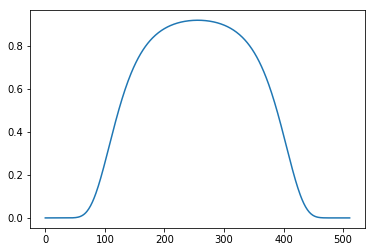

In [263]:
pd.Series(sg[15]).plot()

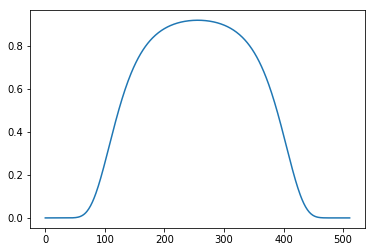

In [264]:
pd.Series(sg[:,15]).plot()

In [59]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.0, 2.0, -1.0],[3.0, 4.0, -3.2]]), np.array([[1, 0, 1]])

In [65]:
Y

array([[1, 0, 1]])

In [144]:
def sigmoid(Z):
    s = 1/(1+np.exp(-Z))
    return s

In [145]:
A = sigmoid(np.dot(w.T + b, X))

In [146]:
A

array([[9.99999694e-01, 1.00000000e+00, 1.37450754e-07]])

In [147]:
A = sigmoid(np.dot(w.T, X) + b)

In [148]:
np.log(A)

array([[-1.23402190e-04, -6.14419348e-06, -5.40450641e+00]])

In [149]:
1-Y

array([[0, 1, 0]])

In [150]:
cost = Y * np.log(A) + ((1-Y) * np.log(1-A))

In [151]:
-cost.sum() / 3

5.801545319394553

In [152]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'